# Задание 1. Одномерные величины

In [798]:
import pandas as pd
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from matplotlib import mlab
import seaborn as sns
import numpy as np
import scipy.stats as stats
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
import math

In [111]:
df=pd.read_csv('C:/Users/Julia/Documents/ITMO/Statistical_data_analysis/1_data_preparation/no_gaps_stations/UT_Brigham_City_28_WNW.txt', sep=' ')
df['LST_DATE'] = pd.to_datetime(df['LST_DATE'], format='%Y%m%d')
df

,LST_DATE,SUR_TEMP_DAILY_AVG,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,2018-01-01,-4.3,-2.9,-2.2,-1.4,0.3,3.9
1,2018-01-02,-5.6,-3.5,-2.6,-1.6,0.2,3.9
2,2018-01-03,-6.1,-3.9,-3.1,-2.0,0.1,3.8
3,2018-01-04,-4.1,-3.7,-3.1,-2.2,-0.1,3.8
4,2018-01-05,-2.4,-2.8,-2.5,-2.0,-0.2,3.7
...,...,...,...,...,...,...,...
1019,2020-10-16,7.6,9.2,10.5,11.7,13.8,15.5
1020,2020-10-17,13.2,11.6,11.8,12.0,13.3,15.4
1021,2020-10-18,12.1,12.0,12.4,12.5,13.3,15.1
1022,2020-10-19,11.5,11.8,12.4,12.6,13.4,15.0


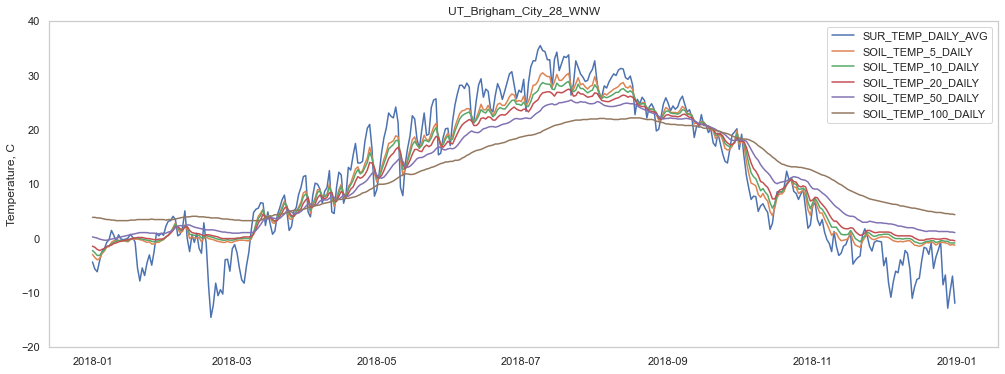

In [806]:
filtered_df=df[(df['LST_DATE'] < '2019-01-01')]
plt.rcParams['figure.figsize'] = [17, 6]
fig, ax = plt.subplots()
ax.plot(filtered_df['LST_DATE'], filtered_df['SUR_TEMP_DAILY_AVG'], label='SUR_TEMP_DAILY_AVG')
ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_5_DAILY'], label='SOIL_TEMP_5_DAILY')
ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_10_DAILY'], label='SOIL_TEMP_10_DAILY')
ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_20_DAILY'], label='SOIL_TEMP_20_DAILY')
ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_50_DAILY'], label='SOIL_TEMP_50_DAILY')
ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_100_DAILY'], label='SOIL_TEMP_100_DAILY')
ax.set(ylabel='Temperature, C',title='UT_Brigham_City_28_WNW')
plt.ylim((-20,40))
plt.legend()
plt.grid()
plt.show()

###  В качестве оцениваемых переменных выбраны температура поверхности (SUR_TEMP_DAILY_AVG) и на глубине 20 см (SOIL_TEMP_20_DAILY)

### Непараметрические оценки плотности распределения

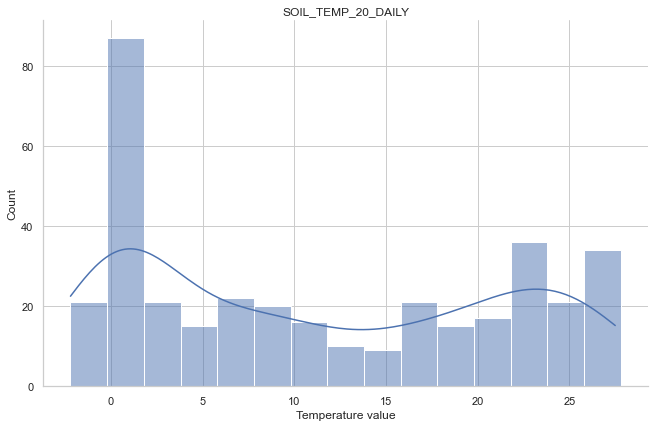

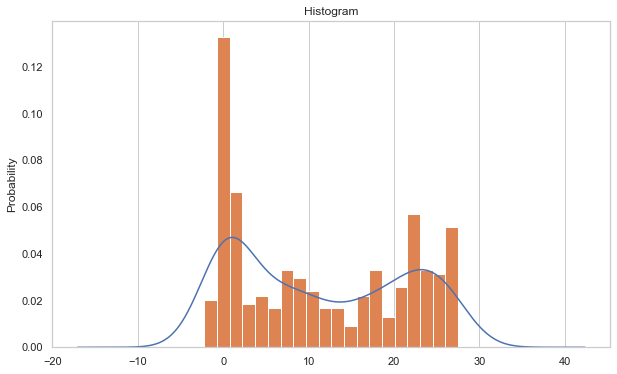

In [807]:
g=sns.displot(filtered_df, x='SOIL_TEMP_20_DAILY', binwidth=2, kde=True)
g.fig.set_size_inches(10,6)
plt.ylabel('Count')
plt.xlabel('Temperature value')
plt.title('SOIL_TEMP_20_DAILY')
plt.show()

plt.rcParams['figure.figsize'] = [10,6]
n_df=filtered_df['SOIL_TEMP_20_DAILY']
fig, ax = plt.subplots()
n_df.plot.kde(ax=ax, legend=False, title='Histogram')
n_df.plot.hist(density=True, ax=ax, bins=20)
ax.set_ylabel('Probability')
ax.grid(axis='y')

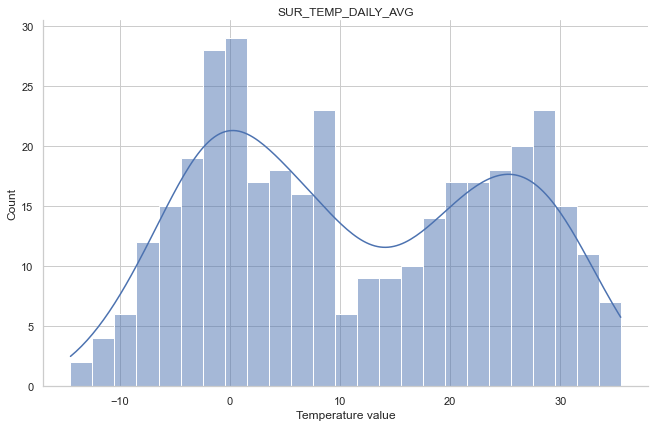

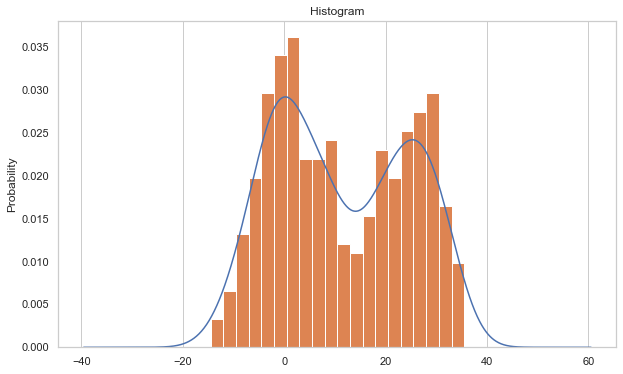

In [808]:
g=sns.displot(filtered_df, x='SUR_TEMP_DAILY_AVG', binwidth=2, kde=True)
g.fig.set_size_inches(10,6)
plt.ylabel('Count')
plt.xlabel('Temperature value')
plt.title('SUR_TEMP_DAILY_AVG')
plt.show()

plt.rcParams['figure.figsize'] = [10,6]
n_df=filtered_df['SUR_TEMP_DAILY_AVG']
fig, ax = plt.subplots()
n_df.plot.kde(ax=ax, legend=False, title='Histogram')
n_df.plot.hist(density=True, ax=ax, bins=20)
ax.set_ylabel('Probability')
ax.grid(axis='y')

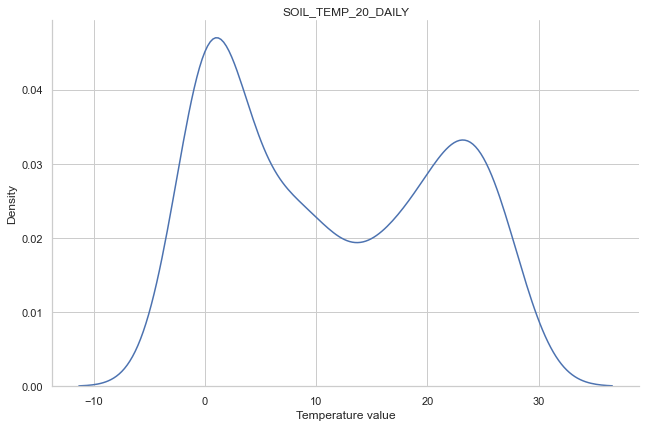

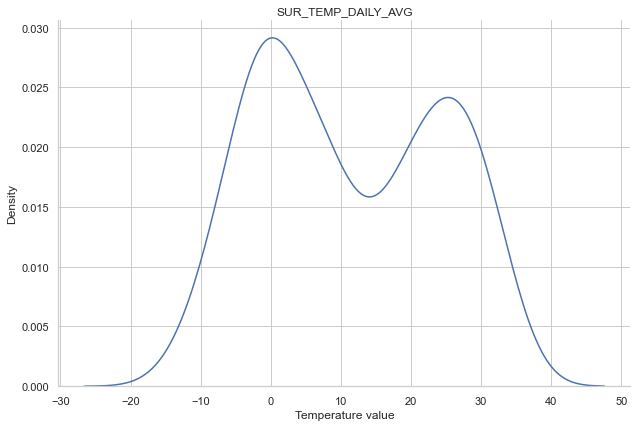

In [810]:
g=sns.displot(filtered_df, x='SOIL_TEMP_20_DAILY', kind="kde")
g.fig.set_size_inches(10,6)
plt.ylabel('Density')
plt.xlabel('Temperature value')
plt.title('SOIL_TEMP_20_DAILY')
plt.show()

g=sns.displot(filtered_df, x='SUR_TEMP_DAILY_AVG', kind="kde")
g.fig.set_size_inches(10,6)
plt.ylabel('Density')
plt.xlabel('Temperature value')
plt.title('SUR_TEMP_DAILY_AVG')
plt.show()

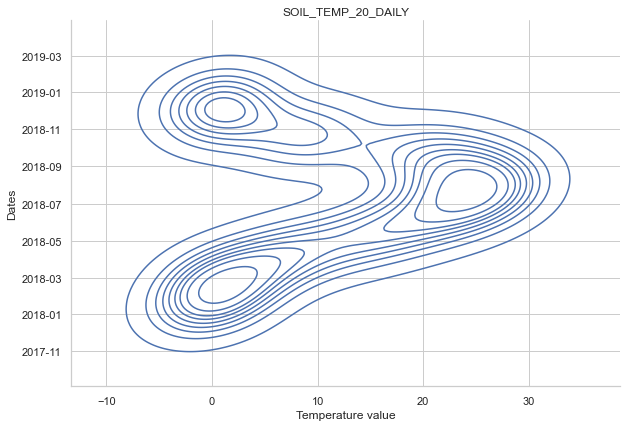

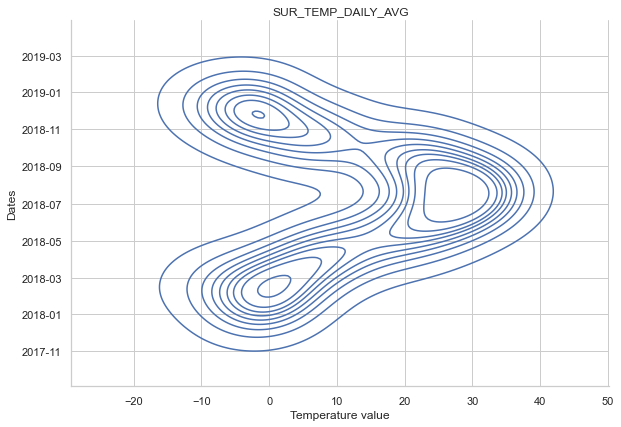

In [813]:
g=sns.displot(filtered_df, x="SOIL_TEMP_20_DAILY", y="LST_DATE", kind="kde")
g.fig.set_size_inches(10,6)
plt.ylabel('Dates')
plt.xlabel('Temperature value')
plt.title('SOIL_TEMP_20_DAILY')
plt.show()

g=sns.displot(filtered_df, x="SUR_TEMP_DAILY_AVG", y="LST_DATE", kind="kde")
g.fig.set_size_inches(10,6)
plt.ylabel('Dates')
plt.xlabel('Temperature value')
plt.title('SUR_TEMP_DAILY_AVG')
plt.show()

### Введение дополнительных категориальных признаков для разделения смеси распределений

In [814]:
def create_category(row):
    if row['SUR_TEMP_DAILY_AVG'] >=13:
        return '>=13'
    if row['SUR_TEMP_DAILY_AVG'] < 13:
        return '<13'
def create_season(column):
    seasons_list=[]
    winter=[1, 2, 12]
    spring=[3, 4, 5]
    summer=[6, 7, 8]
    autumn=[9, 10, 11]
    for row in column:
        if row in winter:
            seasons_list.append('winter') 
        if row in spring:
            seasons_list.append('spring')
        if row in summer:
            seasons_list.append('summer')
        if row in autumn:
            seasons_list.append('autumn')
    return seasons_list
    
filtered_df['temp_interval']=df.apply (lambda row: create_category(row), axis=1)

filtered_df['season']=create_season(filtered_df['LST_DATE'].dt.month)
filtered_df

<ipython-input-814-af241416a304>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['temp_interval']=df.apply (lambda row: create_category(row), axis=1)
<ipython-input-814-af241416a304>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['season']=create_season(filtered_df['LST_DATE'].dt.month)


,LST_DATE,SUR_TEMP_DAILY_AVG,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,temp_interval,season
0,2018-01-01,-4.3,-2.9,-2.2,-1.4,0.3,3.9,<13,winter
1,2018-01-02,-5.6,-3.5,-2.6,-1.6,0.2,3.9,<13,winter
2,2018-01-03,-6.1,-3.9,-3.1,-2.0,0.1,3.8,<13,winter
3,2018-01-04,-4.1,-3.7,-3.1,-2.2,-0.1,3.8,<13,winter
4,2018-01-05,-2.4,-2.8,-2.5,-2.0,-0.2,3.7,<13,winter
...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-6.7,-0.8,-0.5,0.0,1.3,4.6,<13,winter
361,2018-12-28,-12.8,-0.9,-0.5,-0.1,1.3,4.6,<13,winter
362,2018-12-29,-9.7,-1.2,-0.8,-0.3,1.2,4.5,<13,winter
363,2018-12-30,-6.9,-1.1,-0.8,-0.3,1.2,4.5,<13,winter


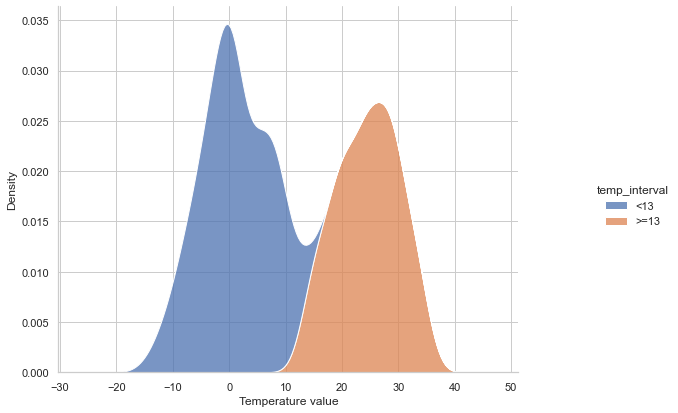

In [815]:
g=sns.displot(filtered_df, x='SUR_TEMP_DAILY_AVG', hue="temp_interval", kind="kde", multiple="stack")
g.fig.set_size_inches(10,6)
plt.ylabel('Density')
plt.xlabel('Temperature value')
plt.show()

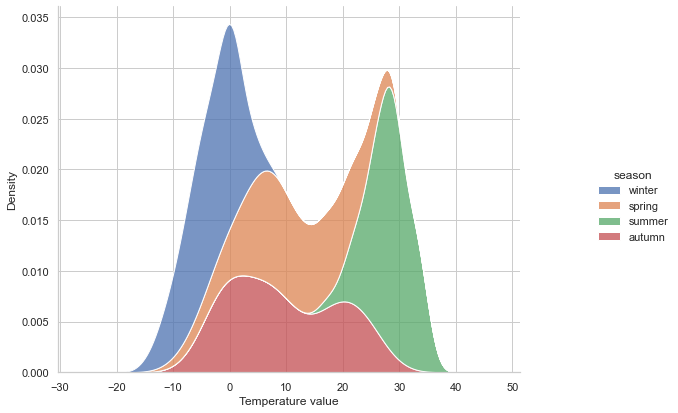

In [816]:
g=sns.displot(filtered_df, x='SUR_TEMP_DAILY_AVG', hue="season", kind="kde", multiple="stack")
g.fig.set_size_inches(10,6)
plt.ylabel('Density')
plt.xlabel('Temperature value')
plt.show()

## Выборочные статистики и доверительные интервалы для них

In [817]:
selected_pars_df=filtered_df[['SUR_TEMP_DAILY_AVG', 'SOIL_TEMP_20_DAILY']]
selected_pars_df.describe()

,SUR_TEMP_DAILY_AVG,SOIL_TEMP_20_DAILY
count,365.000000,365.000000
mean,11.368506,11.326555
std,13.109075,9.900194
min,-14.500000,-2.200000
25%,-0.100000,1.100000
50%,9.000000,9.500000
75%,23.800000,21.700000
max,35.500000,27.500000


In [818]:
selected_pars_df.var(ddof=0)

SUR_TEMP_DAILY_AVG    171.377026
SOIL_TEMP_20_DAILY     97.745301
dtype: float64

In [820]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

print('MEAN:\n')
print('SUR_TEMP_DAILY_AVG:')
print(mean_confidence_interval(selected_pars_df['SUR_TEMP_DAILY_AVG']))
print('SOIL_TEMP_20_DAILY:')
print(mean_confidence_interval(selected_pars_df['SOIL_TEMP_20_DAILY']))

MEAN:

SUR_TEMP_DAILY_AVG:
(11.368506082375628, 10.019170020764648, 12.717842143986609)
SOIL_TEMP_20_DAILY:
(11.326555209343086, 10.307513945491586, 12.345596473194586)


In [821]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.max(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

print('MAX:\n')
print('SUR_TEMP_DAILY_AVG:')
print(mean_confidence_interval(selected_pars_df['SUR_TEMP_DAILY_AVG']))
print('SOIL_TEMP_20_DAILY:')
print(mean_confidence_interval(selected_pars_df['SOIL_TEMP_20_DAILY']))

MAX:

SUR_TEMP_DAILY_AVG:
(35.5, 34.15066393838902, 36.84933606161098)
SOIL_TEMP_20_DAILY:
(27.5, 26.4809587361485, 28.5190412638515)


In [822]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.min(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

print('MIN:\n')
print('SUR_TEMP_DAILY_AVG:')
print(mean_confidence_interval(selected_pars_df['SUR_TEMP_DAILY_AVG']))
print('SOIL_TEMP_20_DAILY:')
print(mean_confidence_interval(selected_pars_df['SOIL_TEMP_20_DAILY']))

MIN:

SUR_TEMP_DAILY_AVG:
(-14.5, -15.84933606161098, -13.15066393838902)
SOIL_TEMP_20_DAILY:
(-2.2, -3.2190412638515005, -1.1809587361484999)


In [823]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.std(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

print('STD:\n')
print('SUR_TEMP_DAILY_AVG:')
print(mean_confidence_interval(selected_pars_df['SUR_TEMP_DAILY_AVG']))
print('SOIL_TEMP_20_DAILY:')
print(mean_confidence_interval(selected_pars_df['SOIL_TEMP_20_DAILY']))

STD:

SUR_TEMP_DAILY_AVG:
(13.091104842463775, 11.741768780852794, 14.440440904074755)
SOIL_TEMP_20_DAILY:
(9.88662231997982, 8.86758105612832, 10.90566358383132)


In [824]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.var(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

print('VAR:\n')
print('SUR_TEMP_DAILY_AVG:')
print(mean_confidence_interval(selected_pars_df['SUR_TEMP_DAILY_AVG']))
print('SOIL_TEMP_20_DAILY:')
print(mean_confidence_interval(selected_pars_df['SOIL_TEMP_20_DAILY']))

VAR:

SUR_TEMP_DAILY_AVG:
(171.37702599637848, 170.0276899347675, 172.72636205798946)
SOIL_TEMP_20_DAILY:
(97.74530089792314, 96.72625963407164, 98.76434216177465)


## Оценки порядковых статистик

In [825]:
quantiles={'0.1': np.quantile(filtered_df['SUR_TEMP_DAILY_AVG'], 0.1),
           '0.25': np.quantile(filtered_df['SUR_TEMP_DAILY_AVG'], 0.25),
           '0.50': np.quantile(filtered_df['SUR_TEMP_DAILY_AVG'], 0.50),
           '0.75': np.quantile(filtered_df['SUR_TEMP_DAILY_AVG'], 0.75),
           '0.90': np.quantile(filtered_df['SUR_TEMP_DAILY_AVG'], 0.90)}
print('SUR_TEMP_DAILY_AVG:')
print('0.1: '+str(quantiles['0.1']))
print('0.25: '+str(quantiles['0.25']))
print('0.50: '+str(quantiles['0.50']))
print('0.75: '+str(quantiles['0.75']))
print('0.90: '+str(quantiles['0.90']))

SUR_TEMP_DAILY_AVG:
0.1: -4.9
0.25: -0.1
0.50: 9.0
0.75: 23.8
0.90: 29.020000000000003


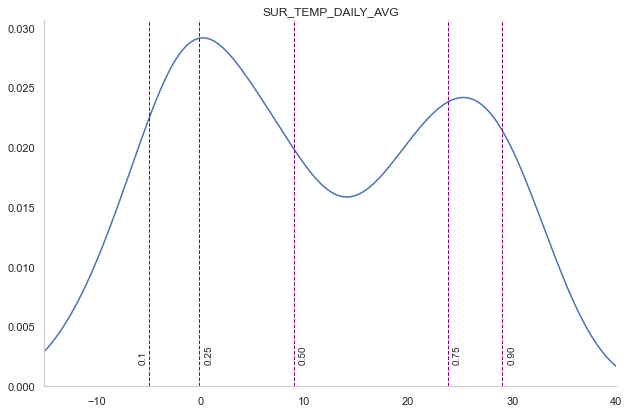

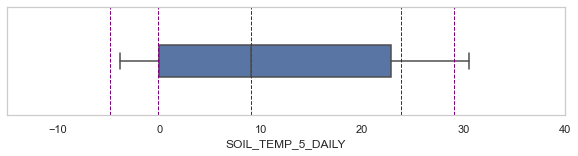

In [827]:
g=sns.displot(filtered_df, x='SUR_TEMP_DAILY_AVG', kind="kde")
g.fig.set_size_inches(10,6)
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.text(quantiles['0.1']-1,0.002,'0.1', rotation=90)
plt.text(quantiles['0.25']+0.5,0.002,'0.25', rotation=90)
plt.text(quantiles['0.50']+0.5,0.002,'0.50', rotation=90)
plt.text(quantiles['0.75']+0.5,0.002,'0.75', rotation=90)
plt.text(quantiles['0.90']+0.5,0.002,'0.90', rotation=90)
plt.ylabel(None)
plt.xlabel(None)
plt.title('SUR_TEMP_DAILY_AVG')
plt.xlim(-15, 40)
#plt.axis('off')
plt.grid(False)
plt.show()

plt.rcParams['figure.figsize'] = [10, 2]
sns.boxplot( x=filtered_df["SOIL_TEMP_5_DAILY"], width=0.3);
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.grid(False)
plt.xlim(-15, 40)
plt.show()

In [828]:
quantiles={'0.1': np.quantile(filtered_df['SOIL_TEMP_20_DAILY'], 0.1),
           '0.25': np.quantile(filtered_df['SOIL_TEMP_20_DAILY'], 0.25),
           '0.50': np.quantile(filtered_df['SOIL_TEMP_20_DAILY'], 0.50),
           '0.75': np.quantile(filtered_df['SOIL_TEMP_20_DAILY'], 0.75),
           '0.90': np.quantile(filtered_df['SOIL_TEMP_20_DAILY'], 0.90)}
print('SOIL_TEMP_20_DAILY:')
print('0.1: '+str(quantiles['0.1']))
print('0.25: '+str(quantiles['0.25']))
print('0.50: '+str(quantiles['0.50']))
print('0.75: '+str(quantiles['0.75']))
print('0.90: '+str(quantiles['0.90']))

SOIL_TEMP_20_DAILY:
0.1: 0.0
0.25: 1.1
0.50: 9.5
0.75: 21.7
0.90: 25.46


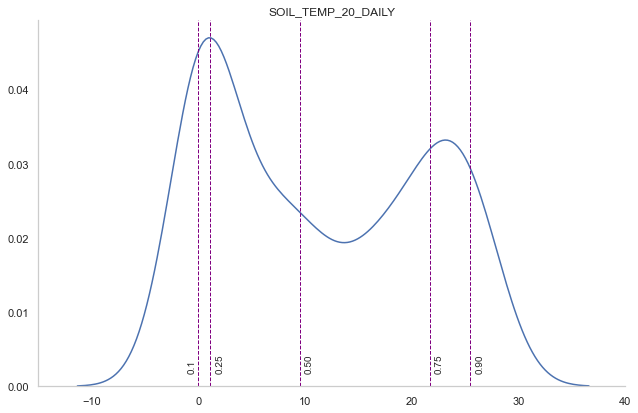

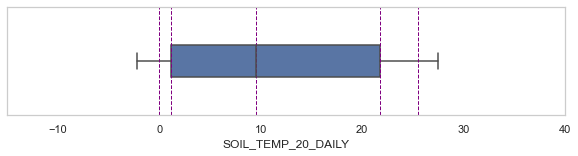

In [830]:
g=sns.displot(filtered_df, x='SOIL_TEMP_20_DAILY', kind="kde")
g.fig.set_size_inches(10,6)
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.text(quantiles['0.1']-1,0.002,'0.1', rotation=90)
plt.text(quantiles['0.25']+0.5,0.002,'0.25', rotation=90)
plt.text(quantiles['0.50']+0.5,0.002,'0.50', rotation=90)
plt.text(quantiles['0.75']+0.5,0.002,'0.75', rotation=90)
plt.text(quantiles['0.90']+0.5,0.002,'0.90', rotation=90)
plt.ylabel(None)
plt.xlabel(None)
plt.title('SOIL_TEMP_20_DAILY')
plt.xlim(-15, 40)
#plt.axis('off')
plt.grid(False)
plt.show()

plt.rcParams['figure.figsize'] = [10, 2]
sns.boxplot( x=filtered_df["SOIL_TEMP_20_DAILY"], width=0.3);
plt.axvline(x=quantiles['0.1'], linewidth=1, color='purple', linestyle='dashed', label='0.1')
plt.axvline(x=quantiles['0.25'], linewidth=1, color='purple', linestyle='dashed', label='0.25')
plt.axvline(x=quantiles['0.50'], linewidth=1, color='purple', linestyle='dashed', label='0.50')
plt.axvline(x=quantiles['0.75'], linewidth=1, color='purple', linestyle='dashed', label='0.75')
plt.axvline(x=quantiles['0.90'], linewidth=1, color='purple', linestyle='dashed', label='0.9')
plt.grid(False)
plt.xlim(-15, 40)
plt.show()

## Разделение смеси распределений на два кластера (SOIL_TEMP_20_DAILY)

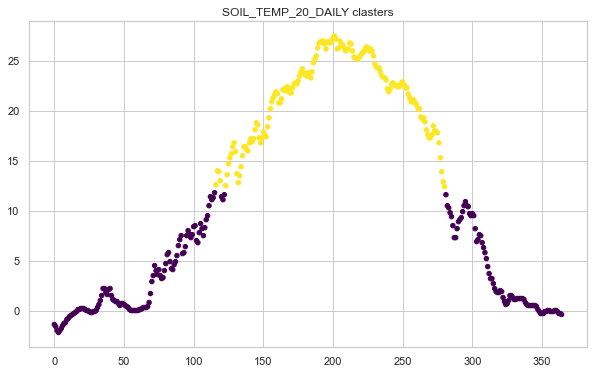

[ 3.29471948 21.36760012]
[3.98783713 4.31167096]
[0.5555863 0.4444137]


In [841]:
plt.rcParams['figure.figsize'] = [10, 6]
values=filtered_df["SOIL_TEMP_20_DAILY"].to_numpy()
X = values.reshape(365, 1)
gmm = mixture.GaussianMixture(n_components=2, ).fit(X)

labels = gmm.predict(X)
plt.scatter(np.arange(365), X.reshape(1, 365),  c=labels, s=20, cmap='viridis')
plt.title('SOIL_TEMP_20_DAILY clasters')
plt.show()

means_hat = gmm.means_.flatten()
weights_hat = gmm.weights_.flatten()
sds_hat = np.sqrt(gmm.covariances_).flatten()


print(means_hat)
print(sds_hat)
print(weights_hat)


X=X.reshape(1, 365)
labels=labels.reshape(1, 365)
first_gauss_data=X[labels==0]
second_gauss_data=X[labels==1]

## Определение параметров распределения на основе метода максимального правдоподобия (нормальное распределение)  (SOIL_TEMP_20_DAILY)

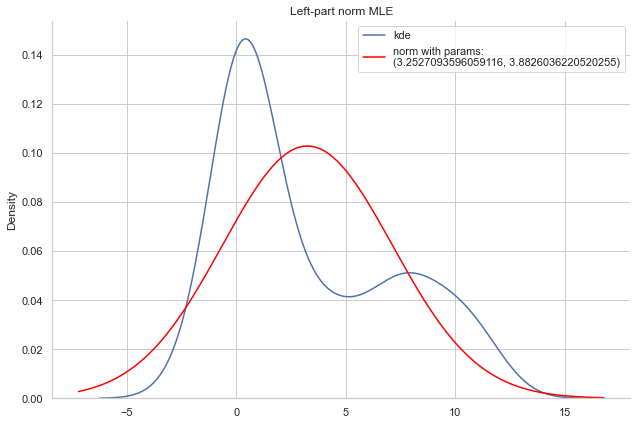

KstestResult(statistic=0.19632631925666172, pvalue=2.485850126102279e-07)
Power_divergenceResult(statistic=940.7990913221263, pvalue=1.2252956506587738e-95)


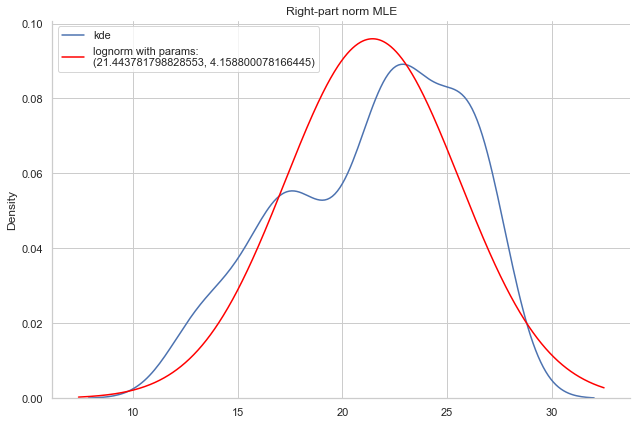

KstestResult(statistic=0.09863684357704017, pvalue=0.07985091321900928)
Power_divergenceResult(statistic=130.6621265265129, pvalue=0.9618469938757647)


In [772]:
g=sns.displot(first_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(first_gauss_data)
x = np.linspace(np.min(first_gauss_data)-5, np.max(first_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='norm with params:\n'+str(stats.norm.fit(first_gauss_data)))
plt.title('Left-part norm MLE')
plt.legend(loc='upper right')
plt.show()

ks = scipy.stats.kstest(first_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(first_gauss_data)
print(ks)
print(chi2)


g=sns.displot(second_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(second_gauss_data)
x = np.linspace(np.min(second_gauss_data)-5, np.max(second_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='lognorm with params:\n'+str(stats.norm.fit(second_gauss_data)))
plt.title('Right-part norm MLE')
plt.legend(loc='upper left')
plt.show()

ks = scipy.stats.kstest(second_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(second_gauss_data)
print(ks)
print(chi2)

## Определение параметров распределения на основе метода максимального правдоподобия (логнормальное распределение) (SOIL_TEMP_20_DAILY)

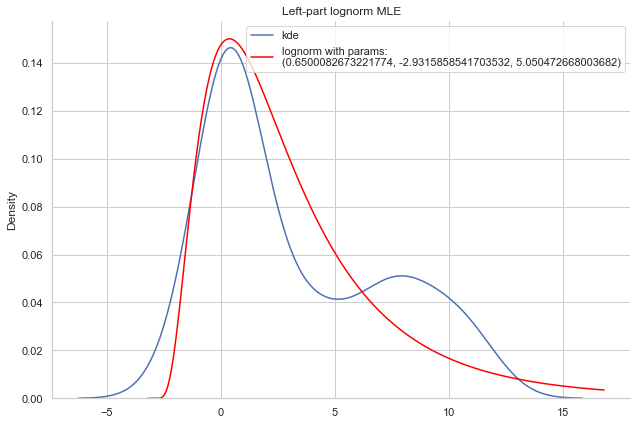

KstestResult(statistic=0.11393132877839329, pvalue=0.009441953611700806)
Power_divergenceResult(statistic=940.7990913221263, pvalue=1.2252956506587738e-95)


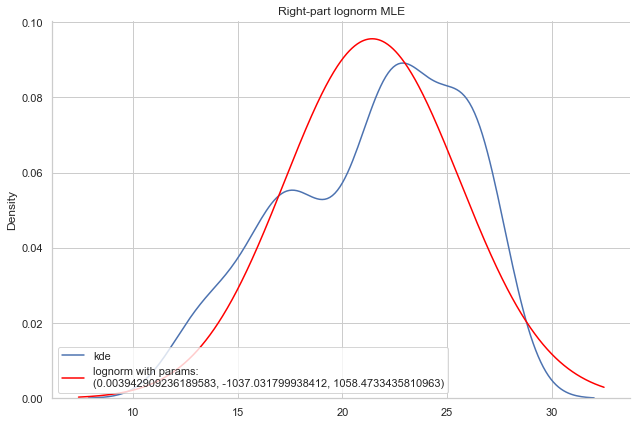

KstestResult(statistic=0.09876117568166931, pvalue=0.07921008644902927)
Power_divergenceResult(statistic=130.6621265265129, pvalue=0.9618469938757647)


In [773]:
x = np.linspace(np.min(first_gauss_data)-1, np.max(first_gauss_data)+5, 1000)
pdf = stats.lognorm.pdf(x, *stats.lognorm.fit(first_gauss_data))
g=sns.displot(first_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
plt.plot(x, pdf, c='red', label='lognorm with params:\n'+str(stats.lognorm.fit(first_gauss_data)))
plt.title('Left-part lognorm MLE')
plt.legend(loc='upper right')
plt.show()
params = stats.lognorm.fit(first_gauss_data)
ks = scipy.stats.kstest(first_gauss_data, 'lognorm', params, N=1000)
chi2 = scipy.stats.chisquare(first_gauss_data)
print(ks)
print(chi2)


x = np.linspace(np.min(second_gauss_data)-5, np.max(second_gauss_data)+5, 1000)
pdf = stats.lognorm.pdf(x, *stats.lognorm.fit(second_gauss_data))
g=sns.displot(second_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
plt.plot(x, pdf, c='red', label='lognorm with params:\n'+str(stats.lognorm.fit(second_gauss_data)))
plt.title('Right-part lognorm MLE')
plt.legend(loc='lower left')
plt.show()
params = stats.lognorm.fit(second_gauss_data)
ks = scipy.stats.kstest(second_gauss_data, 'lognorm', params, N=1000)
chi2 = scipy.stats.chisquare(second_gauss_data)
print(ks)
print(chi2)

## Определение параметров распределения на основе метода максимального правдоподобия (Распределение Стьюдента)  (SOIL_TEMP_20_DAILY)

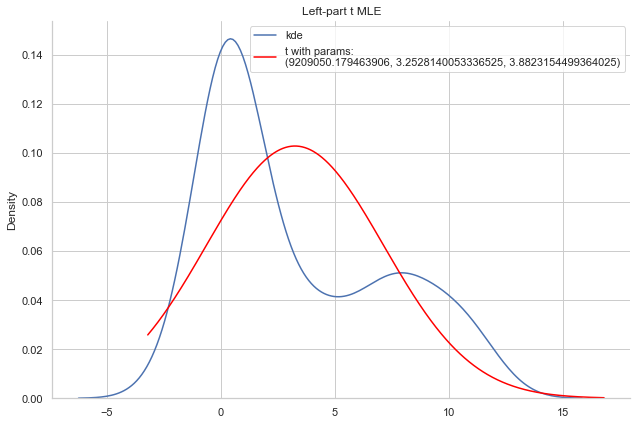

KstestResult(statistic=0.1963480979683957, pvalue=2.47705452242827e-07)
Power_divergenceResult(statistic=940.7990913221263, pvalue=1.2252956506587738e-95)


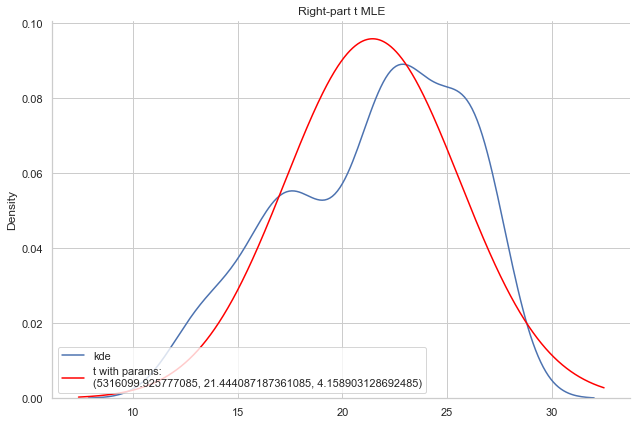

KstestResult(statistic=0.09860699568209497, pvalue=0.08000540286965607)
Power_divergenceResult(statistic=130.6621265265129, pvalue=0.9618469938757647)


In [782]:
x = np.linspace(np.min(first_gauss_data)-1, np.max(first_gauss_data)+5, 1000)
pdf = stats.t.pdf(x, *stats.t.fit(first_gauss_data))
g=sns.displot(first_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
plt.plot(x, pdf, c='red', label='t with params:\n'+str(stats.t.fit(first_gauss_data)))
plt.title('Left-part t MLE')
plt.legend(loc='upper right')
plt.show()
params = stats.t.fit(first_gauss_data)
ks = scipy.stats.kstest(first_gauss_data, 't', params, N=1000)
chi2 = scipy.stats.chisquare(first_gauss_data)
print(ks)
print(chi2)


x = np.linspace(np.min(second_gauss_data)-5, np.max(second_gauss_data)+5, 1000)
pdf = stats.t.pdf(x, *stats.t.fit(second_gauss_data))
g=sns.displot(second_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
plt.plot(x, pdf, c='red', label='t with params:\n'+str(stats.t.fit(second_gauss_data)))
plt.title('Right-part t MLE')
plt.legend(loc='lower left')
plt.show()
params = stats.t.fit(second_gauss_data)
ks = scipy.stats.kstest(second_gauss_data, 't', params, N=1000)
chi2 = scipy.stats.chisquare(second_gauss_data)
print(ks)
print(chi2)

## Построение квантильного биплота для эмпирического и теоретического  распределения  (SOIL_TEMP_20_DAILY)

### Логнормальное распределение

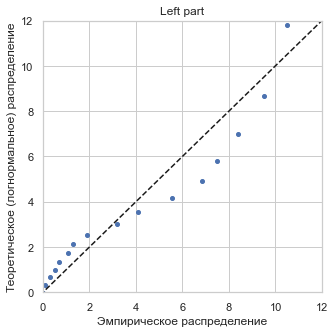

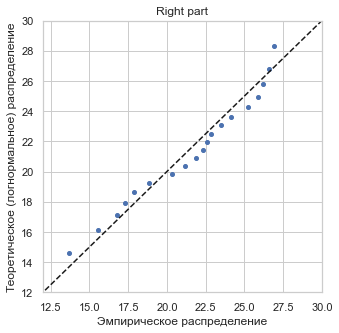

In [804]:
# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(first_gauss_data)-1, np.max(first_gauss_data)+5, 1000)
qn_first = np.percentile(first_gauss_data, percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *stats.lognorm.fit(first_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (логнормальное) распределение')
plt.title('Left part')
plt.show()

# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(second_gauss_data)-1, np.max(second_gauss_data)+5, 1000)
qn_first = np.percentile(second_gauss_data, percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *stats.lognorm.fit(second_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(12, 30)
plt.ylim(12, 30)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (логнормальное) распределение')
plt.title('Right part')
plt.show()

### Нормальное распределение

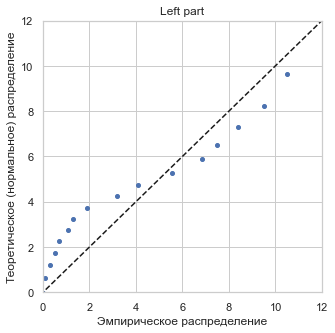

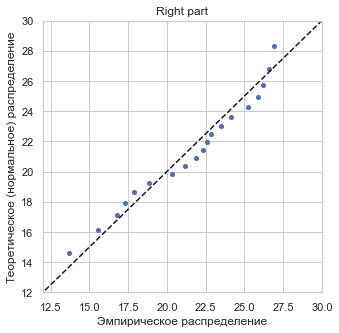

In [805]:
# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(first_gauss_data)-1, np.max(first_gauss_data)+5, 1000)
qn_first = np.percentile(first_gauss_data, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *stats.norm.fit(first_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')
plt.title('Left part')
plt.show()

# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(second_gauss_data)-1, np.max(second_gauss_data)+5, 1000)
qn_first = np.percentile(second_gauss_data, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *stats.norm.fit(second_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(12, 30)
plt.ylim(12, 30)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')
plt.title('Right part')
plt.show()

## Разделение смеси распределений на два кластера (SUR_TEMP_DAILY_AVG)

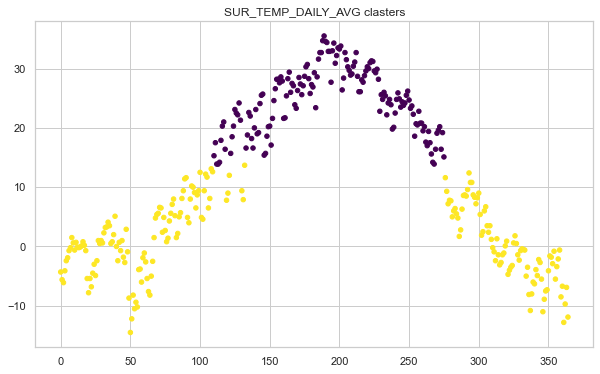

[24.53570766  1.17838467]
[5.68022528 6.40485392]
[0.43627095 0.56372905]


In [843]:
plt.rcParams['figure.figsize'] = [10, 6]
values=filtered_df["SUR_TEMP_DAILY_AVG"].to_numpy()
X = values.reshape(365, 1)
gmm = mixture.GaussianMixture(n_components=2, ).fit(X)

labels = gmm.predict(X)
plt.scatter(np.arange(365), X.reshape(1, 365),  c=labels, s=20, cmap='viridis')
plt.title('SUR_TEMP_DAILY_AVG clasters')
plt.show()

means_hat = gmm.means_.flatten()
weights_hat = gmm.weights_.flatten()
sds_hat = np.sqrt(gmm.covariances_).flatten()


print(means_hat)
print(sds_hat)
print(weights_hat)

X=X.reshape(1, 365)
labels=labels.reshape(1, 365)
first_gauss_data=X[labels==0]
second_gauss_data=X[labels==1]

## Определение параметров распределения на основе метода максимального правдоподобия (нормальное распределение)  (SUR_TEMP_DAILY_AVG)

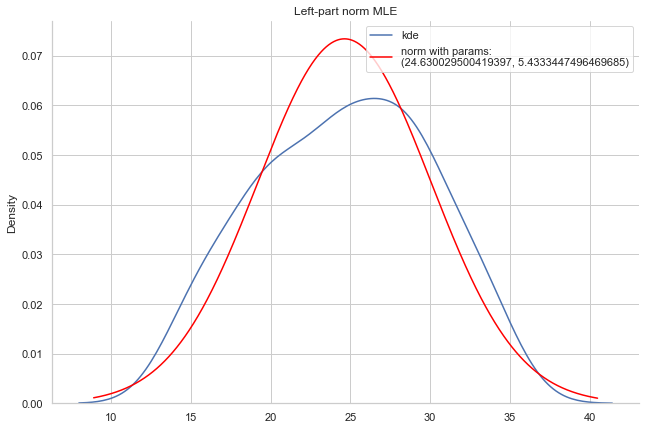

KstestResult(statistic=0.05722257351394355, pvalue=0.6498866164182748)
Power_divergenceResult(statistic=191.77393299030257, pvalue=0.0390611565864204)


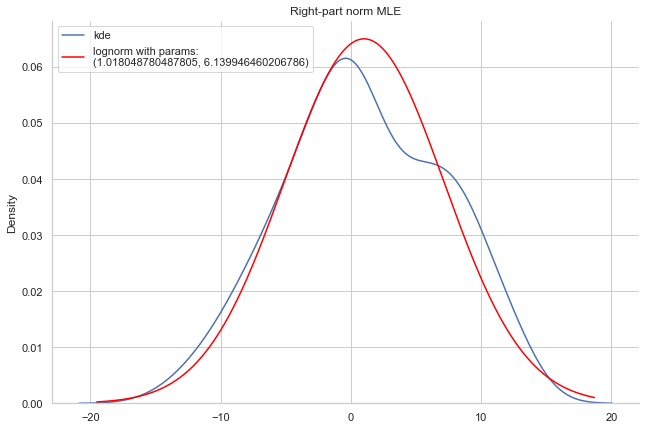

KstestResult(statistic=0.052990211165235945, pvalue=0.5936092212659203)
Power_divergenceResult(statistic=7591.270052707235, pvalue=0.0)


In [844]:
g=sns.displot(first_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(first_gauss_data)
x = np.linspace(np.min(first_gauss_data)-5, np.max(first_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='norm with params:\n'+str(stats.norm.fit(first_gauss_data)))
plt.title('Left-part norm MLE')
plt.legend(loc='upper right')
plt.show()

ks = scipy.stats.kstest(first_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(first_gauss_data)
print(ks)
print(chi2)


g=sns.displot(second_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
params = stats.norm.fit(second_gauss_data)
x = np.linspace(np.min(second_gauss_data)-5, np.max(second_gauss_data)+5, 1000)
plt.plot(x, stats.norm.pdf(x, *params), c='red', label='lognorm with params:\n'+str(stats.norm.fit(second_gauss_data)))
plt.title('Right-part norm MLE')
plt.legend(loc='upper left')
plt.show()

ks = scipy.stats.kstest(second_gauss_data, 'norm', params, N=1000)
chi2 = scipy.stats.chisquare(second_gauss_data)
print(ks)
print(chi2)

## Определение параметров распределения на основе метода максимального правдоподобия (логнормальное распределение)  (SUR_TEMP_DAILY_AVG)

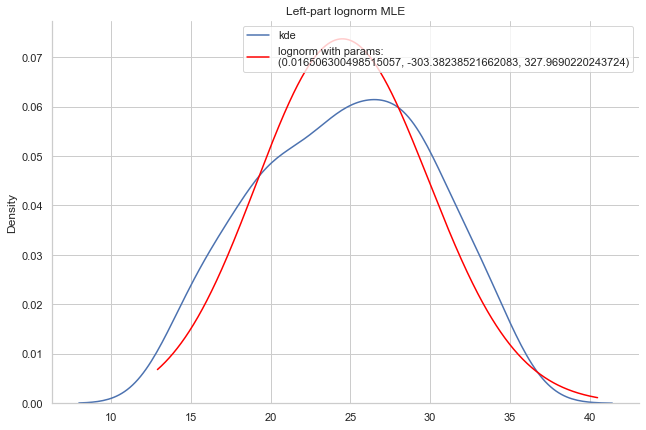

KstestResult(statistic=0.059462044165445094, pvalue=0.6021758187698714)
Power_divergenceResult(statistic=191.77393299030257, pvalue=0.0390611565864204)


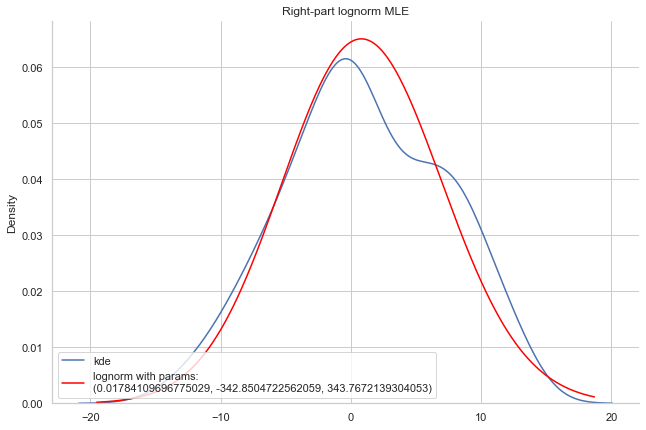

KstestResult(statistic=0.057474996350115104, pvalue=0.4894917532516663)
Power_divergenceResult(statistic=7591.270052707235, pvalue=0.0)


In [845]:
x = np.linspace(np.min(first_gauss_data)-1, np.max(first_gauss_data)+5, 1000)
pdf = stats.lognorm.pdf(x, *stats.lognorm.fit(first_gauss_data))
g=sns.displot(first_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
plt.plot(x, pdf, c='red', label='lognorm with params:\n'+str(stats.lognorm.fit(first_gauss_data)))
plt.title('Left-part lognorm MLE')
plt.legend(loc='upper right')
plt.show()
params = stats.lognorm.fit(first_gauss_data)
ks = scipy.stats.kstest(first_gauss_data, 'lognorm', params, N=1000)
chi2 = scipy.stats.chisquare(first_gauss_data)
print(ks)
print(chi2)


x = np.linspace(np.min(second_gauss_data)-5, np.max(second_gauss_data)+5, 1000)
pdf = stats.lognorm.pdf(x, *stats.lognorm.fit(second_gauss_data))
g=sns.displot(second_gauss_data, kind="kde", label='kde')
g.fig.set_size_inches(10,6)
plt.plot(x, pdf, c='red', label='lognorm with params:\n'+str(stats.lognorm.fit(second_gauss_data)))
plt.title('Right-part lognorm MLE')
plt.legend(loc='lower left')
plt.show()
params = stats.lognorm.fit(second_gauss_data)
ks = scipy.stats.kstest(second_gauss_data, 'lognorm', params, N=1000)
chi2 = scipy.stats.chisquare(second_gauss_data)
print(ks)
print(chi2)

## Построение квантильного биплота для эмпирического и теоретического  распределения  (SUR_TEMP_DAILY_AVG)

### Логнормальное распределение

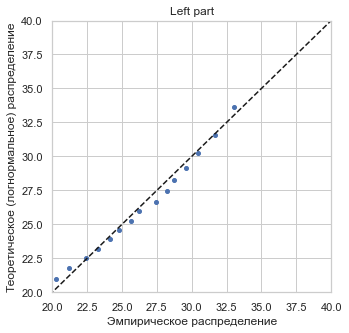

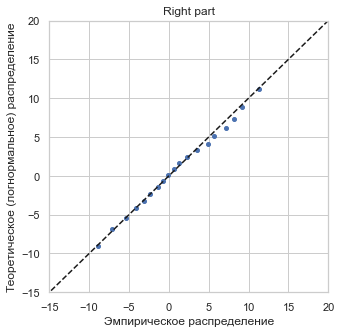

In [852]:
# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(first_gauss_data)-1, np.max(first_gauss_data)+10, 1000)
qn_first = np.percentile(first_gauss_data, percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *stats.lognorm.fit(first_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (логнормальное) распределение')
plt.title('Left part')
plt.show()

# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(second_gauss_data)-1, np.max(second_gauss_data)+10, 1000)
qn_first = np.percentile(second_gauss_data, percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *stats.lognorm.fit(second_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(-15, 20)
plt.ylim(-15, 20)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (логнормальное) распределение')
plt.title('Right part')
plt.show()

### Нормальное распределение

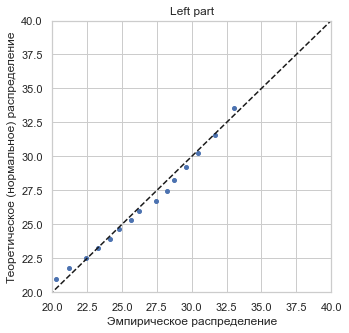

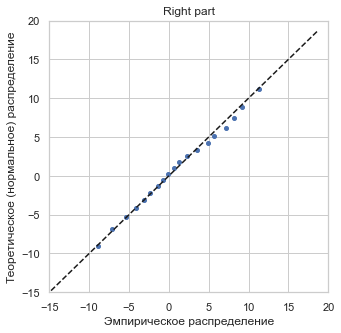

In [853]:
# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(first_gauss_data)-1, np.max(first_gauss_data)+5, 1000)
qn_first = np.percentile(first_gauss_data, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *stats.norm.fit(first_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')
plt.title('Left part')
plt.show()

# Расчет квантилей
percs = np.linspace(0, 100, 21)
x = np.linspace(np.min(second_gauss_data)-1, np.max(second_gauss_data)+5, 1000)
qn_first = np.percentile(second_gauss_data, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *stats.norm.fit(second_gauss_data))

# Построение квантильного биплота
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=4)
plt.plot(x, x, color="k", ls="--")
plt.xlim(-15, 20)
plt.ylim(-15, 20)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')
plt.title('Right part')
plt.show()